In [1]:
# Import necessary libraries for data processing, modeling, and visualization
# --- XGBoost for pdr (Classification) ---

# Import libraries
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
# Load dataset and remove unnecessary column

df = pd.read_csv("dataset.csv")
df = df.drop(columns=['Unnamed: 0'])

# Define features (X) and target (y)
X = df.drop('pdr', axis=1)
y = df['pdr']

In [3]:
# Remove rare classes (classes that appear only once)
class_counts = y.value_counts()
valid_classes = class_counts[class_counts > 1].index
X = X[y.isin(valid_classes)]
y = y[y.isin(valid_classes)]

In [4]:
# Encode target labels
# Encode the target labels into numerical format

le = LabelEncoder()
y = le.fit_transform(y)

In [5]:
# Split the data into training and testing sets
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the model
# Initialize XGBoost classifier with specified parameters

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

In [6]:
# Train the model
# Train the XGBoost model on training data

model.fit(X_train, y_train)

# Predict on the test set
preds = model.predict(X_test)


C:\Users\User\anaconda3\envs\FA0111033\lib\site-packages\xgboost\training.py:183: UserWarning: [02:07:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [7]:
# Evaluate
acc = accuracy_score(y_test, preds)
cm = confusion_matrix(y_test, preds)
print(f"Accuracy: {acc:.4f}")
print(classification_report(y_test, preds))

Accuracy: 0.9927
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       514
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         1
           5       1.00      0.83      0.91         6
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       0.75      1.00      0.86         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       0.00      0.00      0.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         2
          17       0.50      1.00      0.67         1
          18       0.00      0.00      0.00         1
          

C:\Users\User\anaconda3\envs\FA0111033\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\envs\FA0111033\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\envs\FA0111033\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

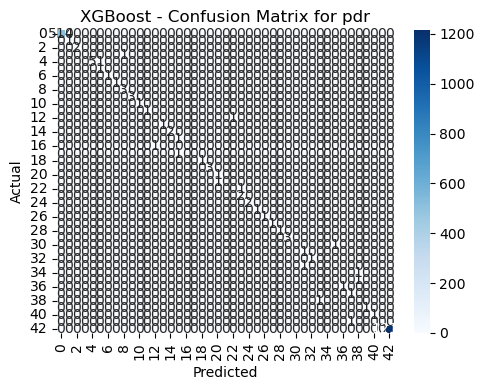

In [8]:
# Plot confusion matrix
# Plot and visualize the confusion matrix

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost - Confusion Matrix for pdr")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

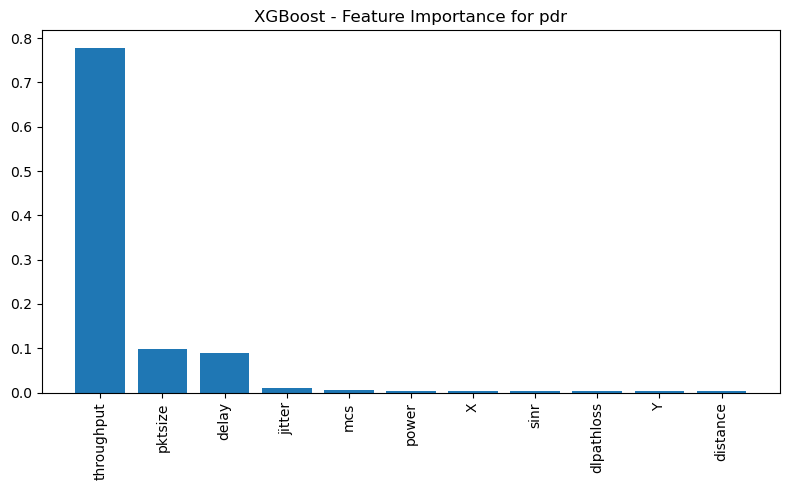

In [9]:
# Plot feature importance
# Plot and visualize feature importance from the model

importances = model.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(8, 5))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("XGBoost - Feature Importance for pdr")
plt.tight_layout()
plt.show()